In [1]:
!ls ../airflow/plugins/utils/

db.py  __pycache__  strategy.py  tinkoff.py


In [2]:
import sys 
sys.path.insert(0, '../airflow/plugins/utils/')

In [3]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [4]:
def _get_db_url(connector: str) -> str:
    return f'user=trader password=income host=localhost port=5432 dbname=stocks'

In [5]:
db._get_db_url = _get_db_url

In [6]:
data = db.get_data_from_table('aaaa', 'aapl')

In [7]:
data.head()

,time,open,high,low,close,volume
0,2020-12-21 07:00:00,127.60,132.00,123.12,128.23,30421273
1,2020-12-22 07:00:00,128.81,134.40,127.28,131.88,31510984
2,2020-12-23 07:00:00,130.50,132.80,130.50,130.96,20511617
3,2020-12-24 07:00:00,131.15,133.46,130.67,131.97,9470208
4,2020-12-28 07:00:00,133.10,137.33,131.75,136.69,23459873


In [8]:
SMA_SHORT = 50
SMA_LONG = 200

In [9]:
data['sma_short'] = data['close'].rolling(SMA_SHORT).mean()
data['sma_long'] = data['close'].rolling(SMA_LONG).mean()

<AxesSubplot:title={'center':'CROSS_SMA: 50 and 200'}>

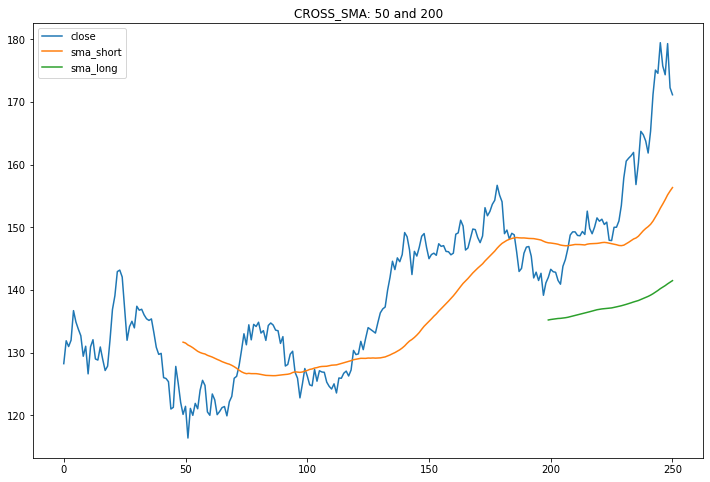

In [10]:
data[['close', 'sma_short', 'sma_long']] \
    .plot(figsize=(12, 8), title=f'CROSS_SMA: {SMA_SHORT} and {SMA_LONG}')

In [11]:
data['position'] = np.where(data['sma_short'] > data['sma_long'], 1, -1)

In [12]:
data['position'].value_counts()

-1    199
 1     52
Name: position, dtype: int64

In [13]:
data.tail(10)

,time,open,high,low,close,volume,sma_short,sma_long,position
241,2021-12-06 04:00:00,161.70,167.87,161.70,165.32,26635166,150.4658,139.16235,1
242,2021-12-07 04:00:00,166.30,173.60,165.18,171.18,25282674,150.9820,139.38895,1
243,2021-12-08 04:00:00,172.06,175.92,170.75,175.08,24227248,151.6454,139.63760,1
244,2021-12-09 04:00:00,175.15,176.72,173.58,174.56,21951736,152.2800,139.90545,1
245,2021-12-10 04:00:00,174.27,179.69,174.27,179.45,24803958,153.0390,140.19640,1
246,2021-12-13 04:00:00,179.00,182.22,175.26,175.74,27970084,153.7008,140.43615,1
247,2021-12-14 04:00:00,175.60,178.12,174.33,174.33,30671309,154.4046,140.68220,1
248,2021-12-15 04:00:00,173.81,179.94,172.31,179.30,28111891,155.1684,140.96840,1
249,2021-12-16 04:00:00,179.11,181.12,170.77,172.26,32089783,155.7736,141.22905,1
250,2021-12-17 04:00:00,172.20,173.46,169.10,171.14,74826610,156.3306,141.47765,1


In [14]:
data.head()

,time,open,high,low,close,volume,sma_short,sma_long,position
0,2020-12-21 07:00:00,127.60,132.00,123.12,128.23,30421273,NaN,NaN,-1
1,2020-12-22 07:00:00,128.81,134.40,127.28,131.88,31510984,NaN,NaN,-1
2,2020-12-23 07:00:00,130.50,132.80,130.50,130.96,20511617,NaN,NaN,-1
3,2020-12-24 07:00:00,131.15,133.46,130.67,131.97,9470208,NaN,NaN,-1
4,2020-12-28 07:00:00,133.10,137.33,131.75,136.69,23459873,NaN,NaN,-1
